# # Online Retail Analytics Report
# **Author**: Zakariah 


# ## 1. Environment Setup

In [1]:
# %%
# Install required packages
%pip install pandas sqlalchemy pyyaml matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.



# Import libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from plotter import Plotter
from db_utils import RDSDatabaseConnector, load_credentials
from data_transform import DataTransform, DataFrameInfo
%matplotlib inline


# 2. Data Loading


In [ ]:

# Initialize database connection
credentials = load_credentials('credentials.yaml')  # Make sure this path is correct
connector = RDSDatabaseConnector(credentials)  # Now we define the connector

# Load data (choose one method)
try:
    # Option 1: Load from local CSV
    raw_df = connector.load_data_from_csv('customer_activity.csv')
except FileNotFoundError:
    # Option 2: Fresh from database if local file missing
    raw_df = connector.extract_data('customer_activity')
    connector.save_data_to_csv(raw_df, 'customer_activity.csv')

# Initial inspection
print("Initial Data Shape:", raw_df.shape)
display(raw_df.head(3))

Initial Data Shape: (12330, 17)


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.4,0,0.0,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False



# 3. Data Cleaning & Transformation


In [4]:

# Clean and transform data
from data_transform import DataFrameTransform


cleaner = DataTransform()
processed_df = cleaner.convert_columns(raw_df.copy())


# Handle missing values
processed_df = DataFrameTransform.impute_missing(processed_df, 'median')

# Show cleaning results
print("\nMissing Values After Cleaning:")
display(DataFrameInfo.count_nulls(processed_df))


Missing Values After Cleaning:


c:\Users\zakme\Documents\GitHub\exploratory-data-analysis---online-shopping-in-retail36\data_transform.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
c:\Users\zakme\Documents\GitHub\exploratory-data-analysis---online-shopping-in-retail36\data_transform.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the i

administrative                0
administrative_duration       0
informational                 0
informational_duration        0
product_related               0
product_related_duration      0
bounce_rates                  0
exit_rates                    0
page_values                   0
month                       247
operating_systems            11
browser                       0
region                        0
traffic_type                  0
visitor_type                  0
weekend                       0
revenue                       0
dtype: int64



# 4. Core Business Analysis


# 4.1 Regional Revenue Analysis


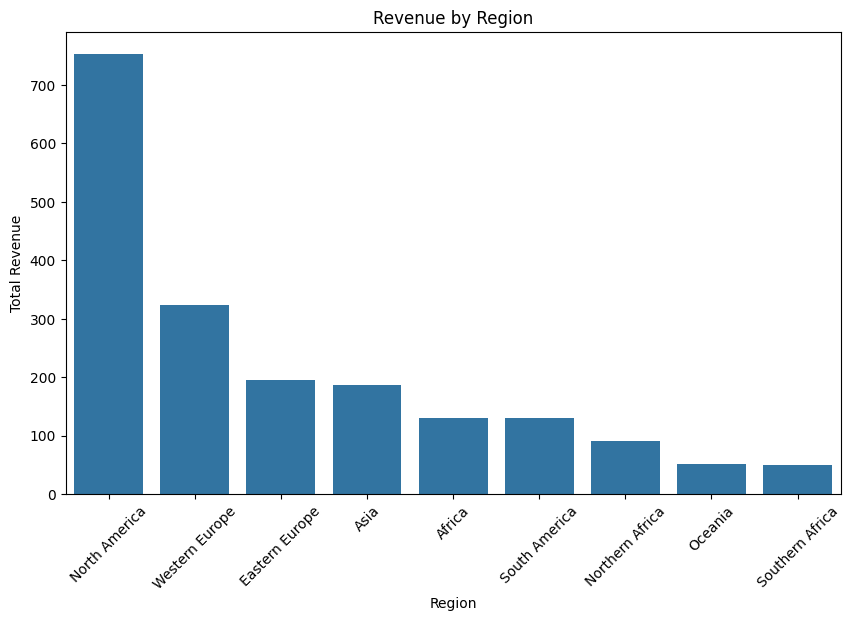

Top Region: North America ($753)
Lowest Region: Southern Africa ($49)


In [5]:

Plotter.plot_regional_revenue(processed_df)
regional_revenue = processed_df.groupby('region')['revenue'].sum()
print(f"Top Region: {regional_revenue.idxmax()} (${regional_revenue.max():,.0f})")
print(f"Lowest Region: {regional_revenue.idxmin()} (${regional_revenue.min():,.0f})")




# 4.2 Customer Conversion Rates


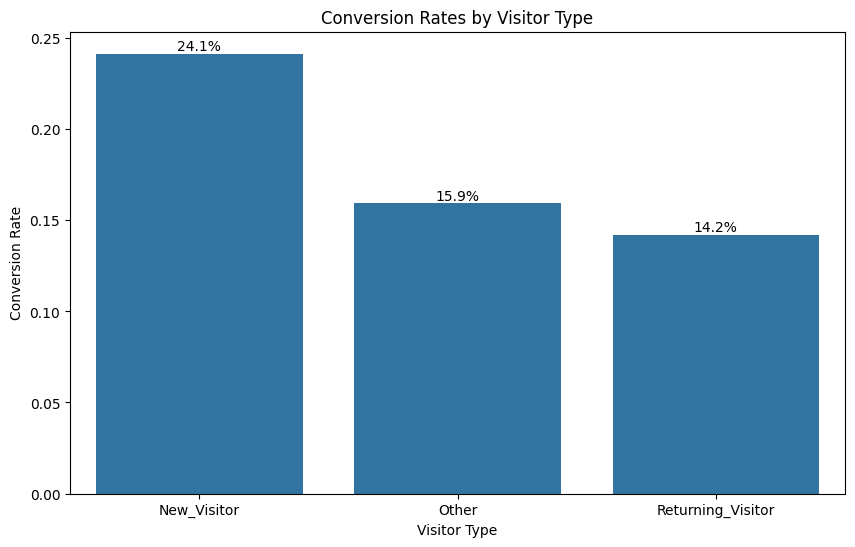

In [6]:
visitor_conversion = processed_df.groupby('visitor_type')['revenue'].mean()
Plotter.plot_visitor_conversion(visitor_conversion)


# 4.3 Weekend vs Weekday Performance



In [ ]:

weekend_mask = processed_df['weekend'].astype(bool)  # Convert to boolean first
t_stat, p_value = stats.ttest_ind(
    processed_df[weekend_mask]['revenue'],
    processed_df[~weekend_mask]['revenue']
)
print(f'Significance Test: p-value = {p_value:.4f}')

Significance Test: p-value = nan



# 4.4 Monthly Sales Trends



c:\Users\zakme\Documents\GitHub\exploratory-data-analysis---online-shopping-in-retail36\plotter.py:213: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('month')['revenue'].sum()


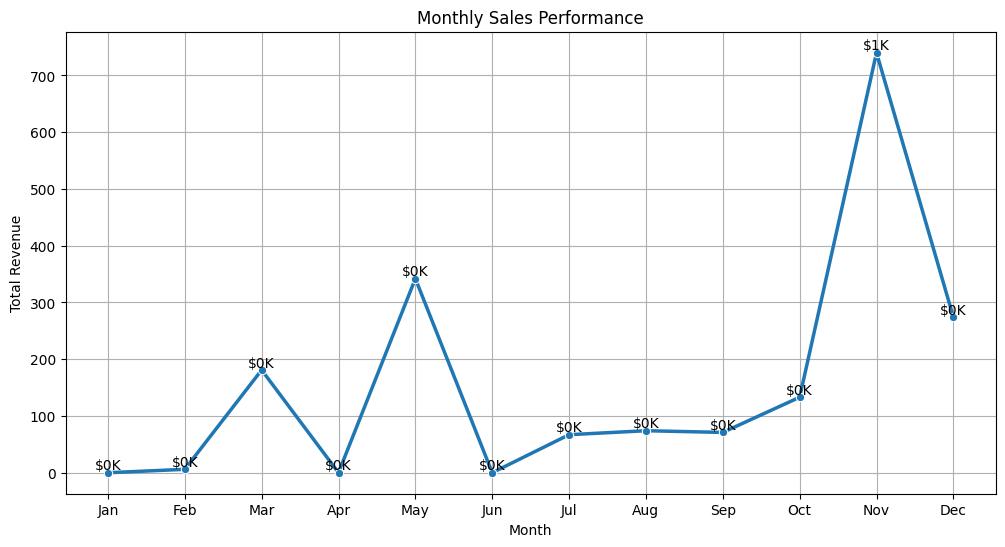

In [ ]:

Plotter.plot_monthly_sales(processed_df)  # Pass the DataFrame directly


# 4.5 Traffic Source Analysis


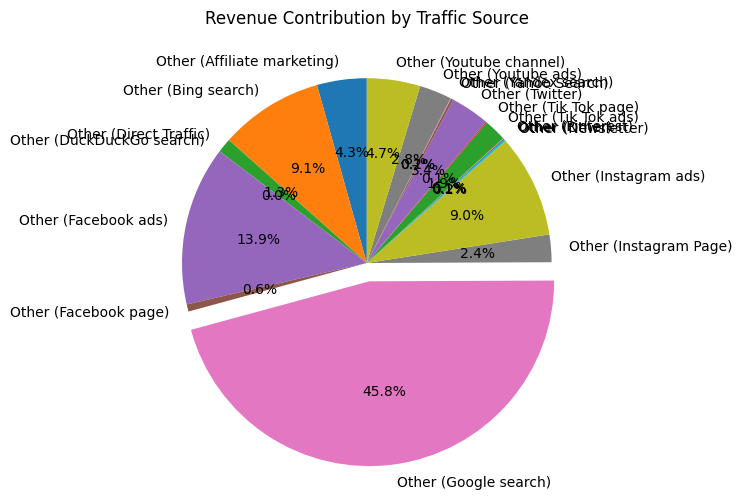

In [9]:
traffic_mapping = {
    1: 'Direct',
    2: 'Social',
    3: 'Ads',
    4: 'Organic',
    5: 'Referral'
}
Plotter.plot_traffic_contribution(processed_df, traffic_mapping)


# 5. Technical System Analysis

# 5.1 Device & OS Usage


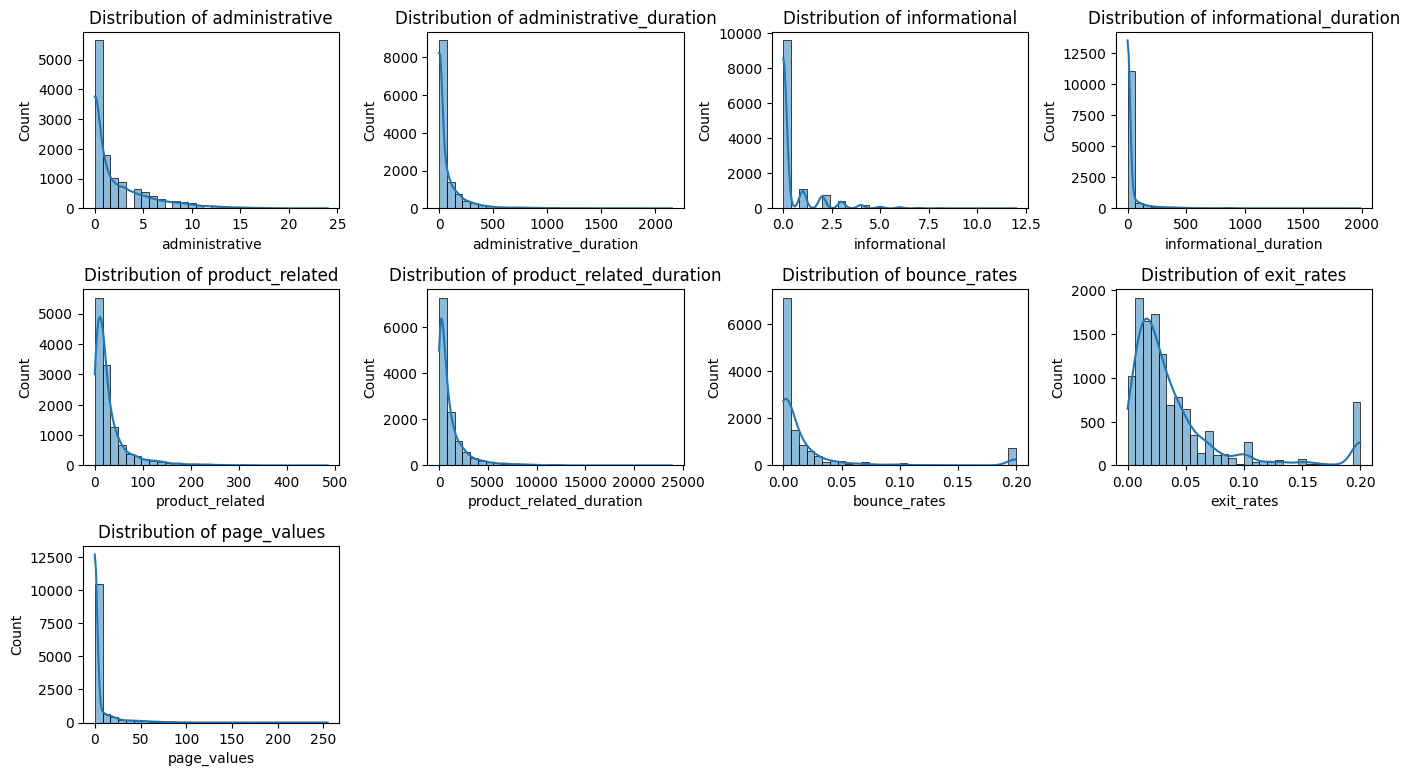

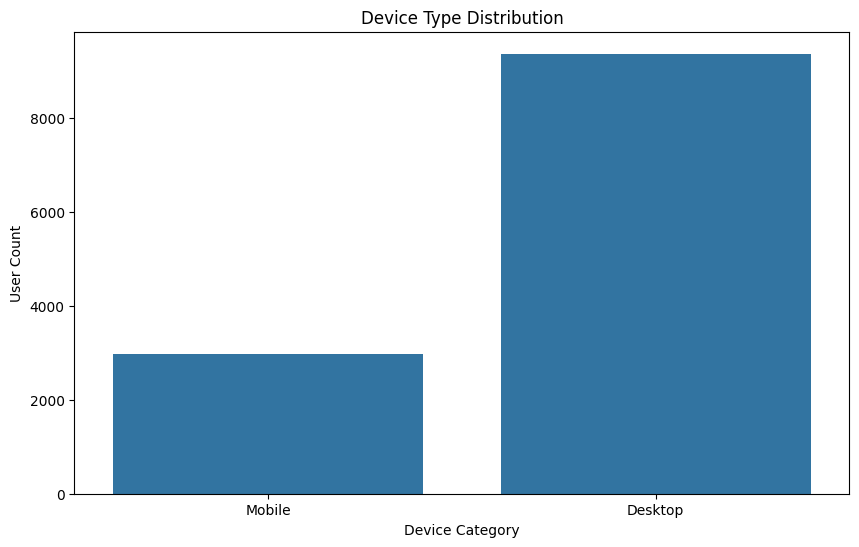

In [10]:
# For distribution plots
Plotter.plot_distributions(processed_df)

# For device breakdown
Plotter.plot_device_breakdown(processed_df)


# 5.2 Browser Analysis


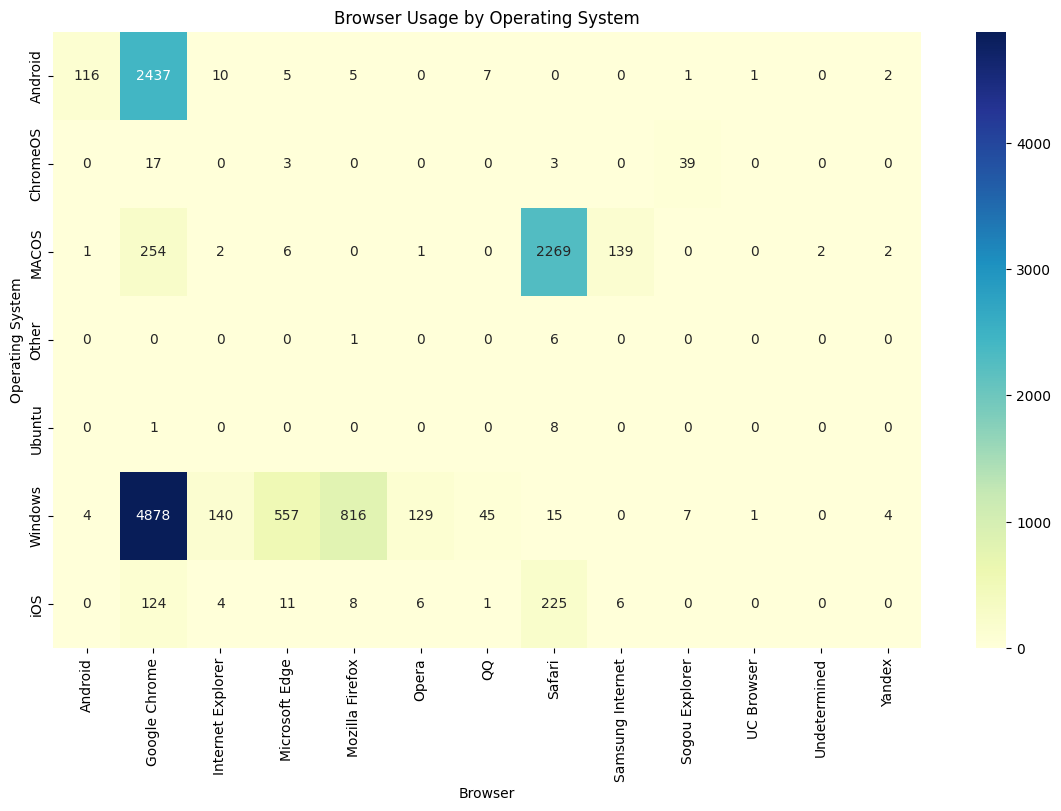

In [11]:

# For OS-browser matrix
Plotter.plot_os_browser_combo(processed_df)


# 6. Marketing Effectiveness

# 6.1 Traffic Source ROI


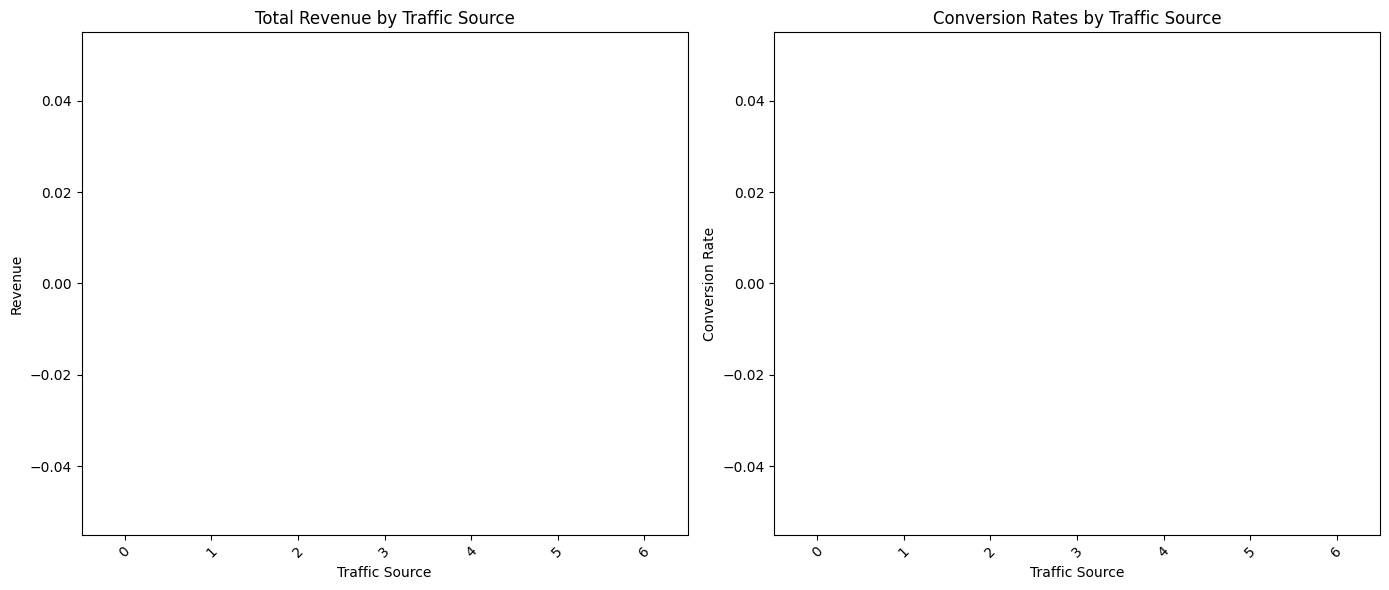

In [12]:
# Plotter.plot_traffic_roi(processed_df, traffic_mapping)
# Define traffic mapping (adjust based on your data dictionary)
traffic_mapping = {
    1: 'Direct',
    2: 'Social',
    3: 'Ads',
    4: 'Organic',
    5: 'Referral',
    6: 'Email',
    7: 'Affiliate',
    8: 'Paid Search'
}

Plotter.plot_traffic_roi(processed_df, traffic_mapping)


# 6.2 Bounce Rate Analysis


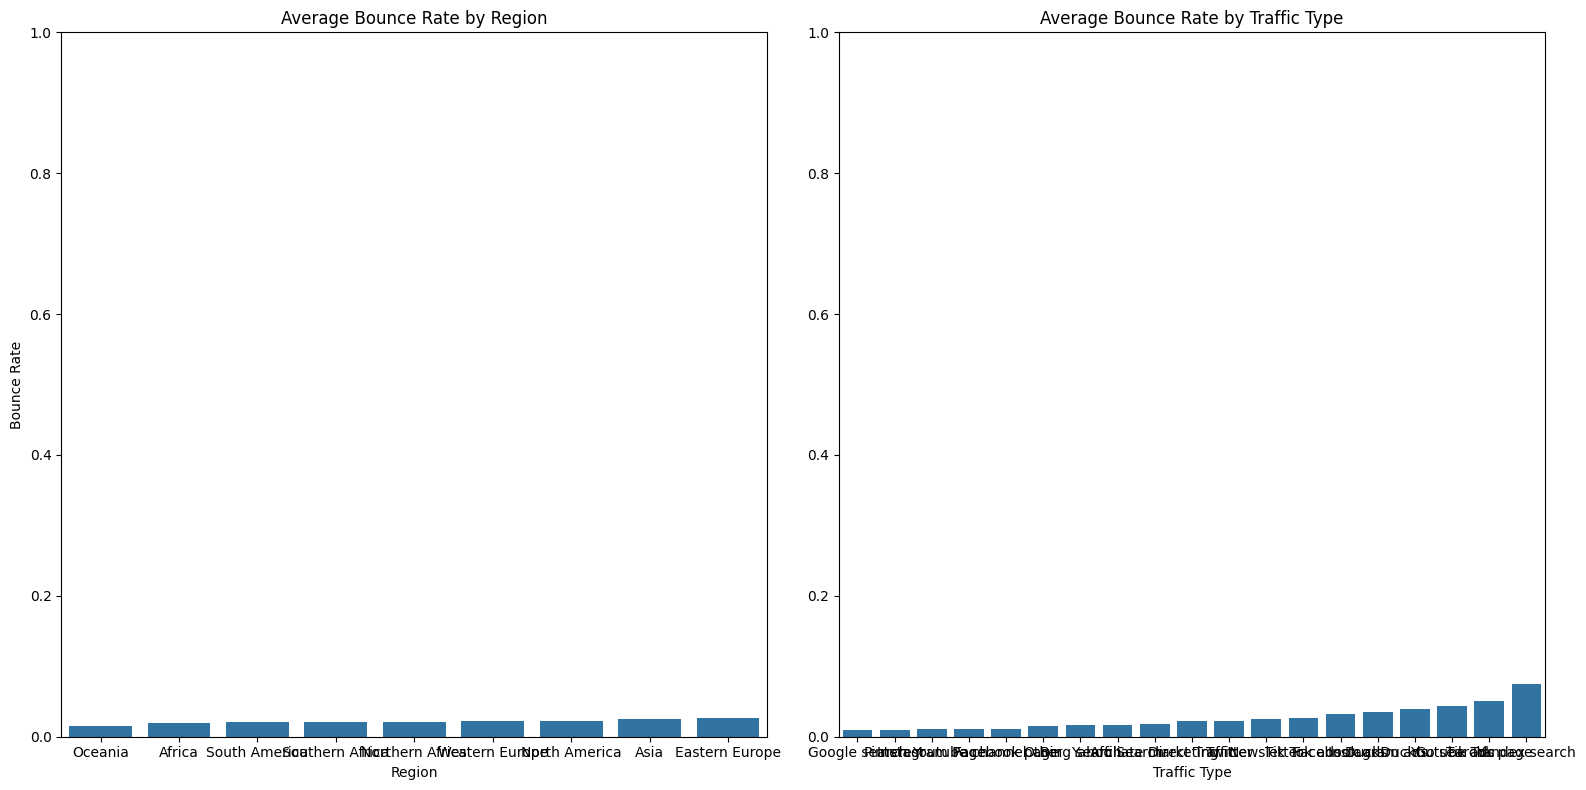

In [13]:
Plotter.plot_bounce_rates(processed_df)


# 7. Advanced Analytics

# 7.1 Correlation Analysis



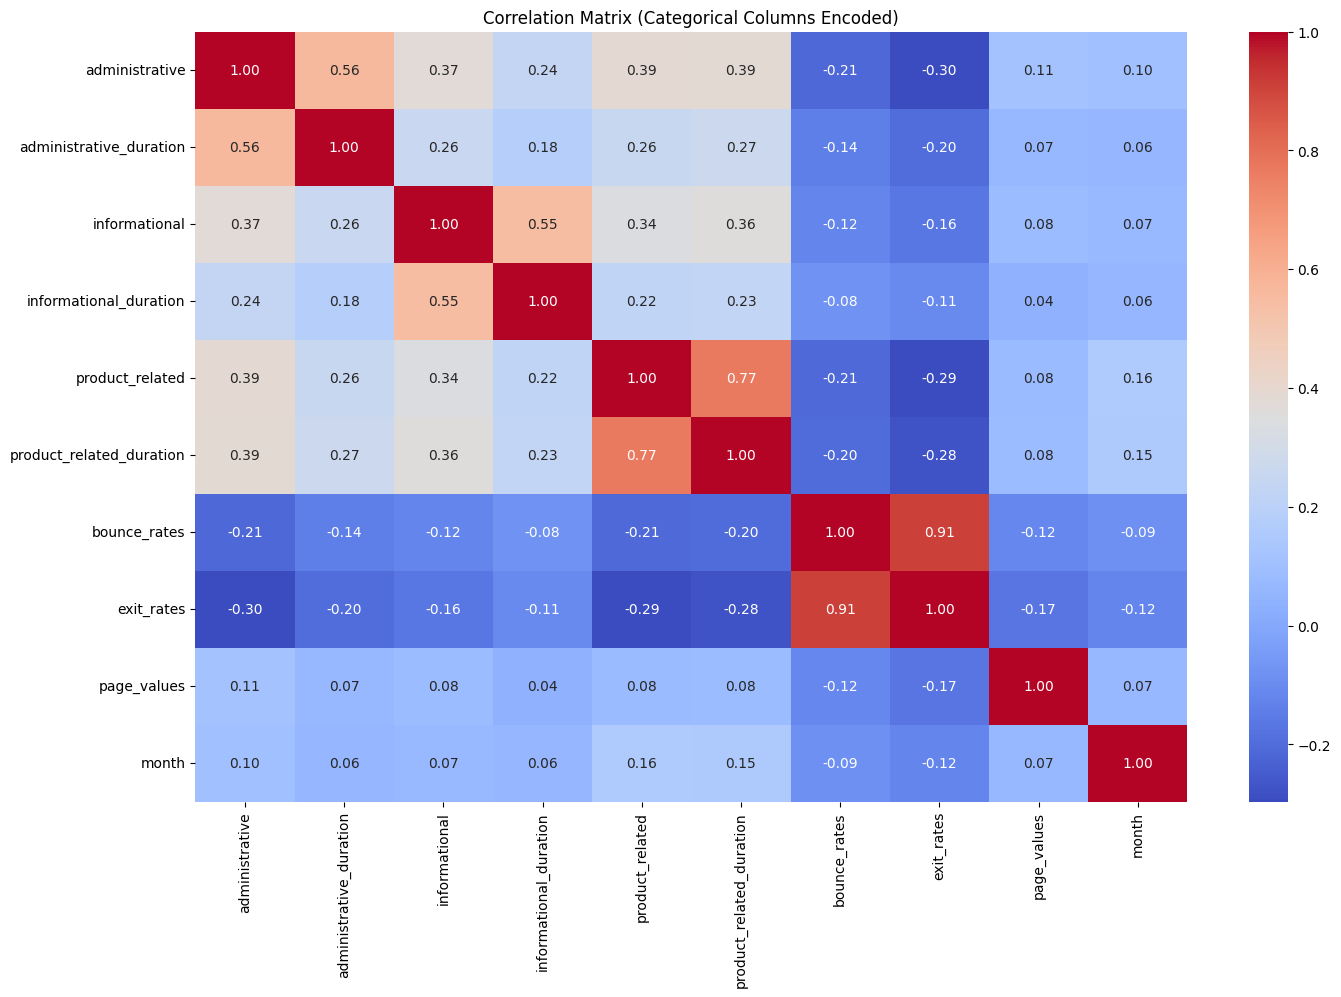

In [14]:
Plotter.plot_correlation_matrix(processed_df)




# 7.2 Anomaly Detection




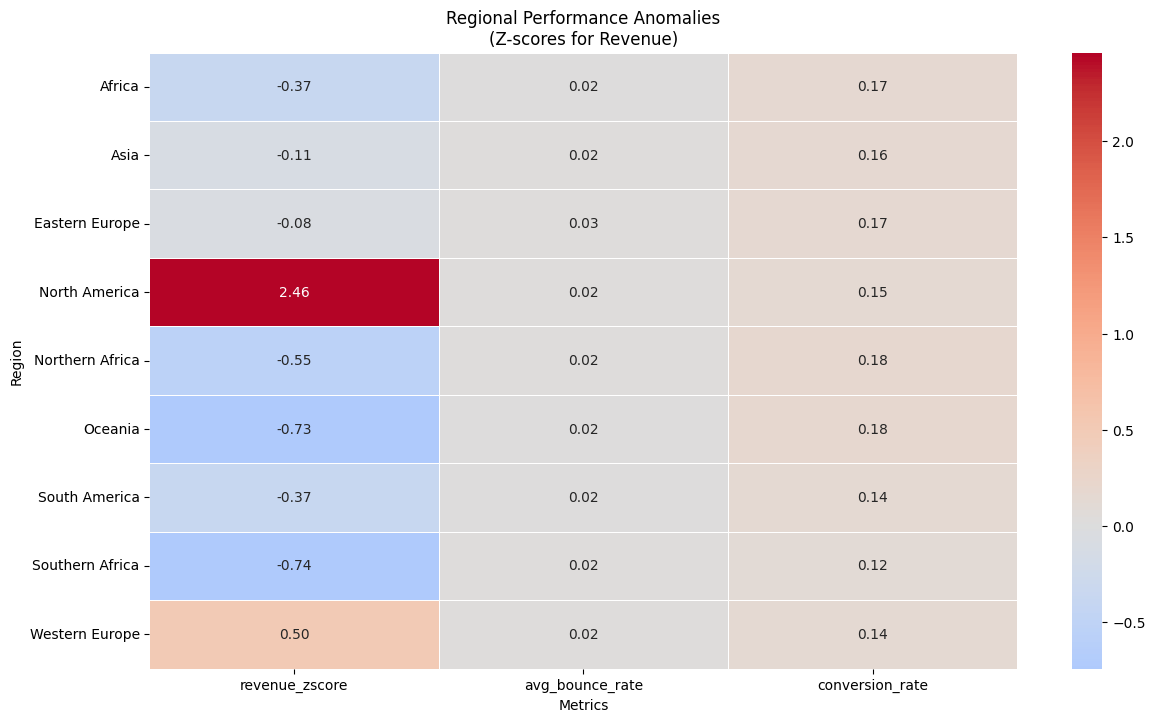

In [15]:
Plotter.plot_regional_anomalies(processed_df)

In [16]:
# %% [code]
# Save cleaned data for future use
connector.save_data_to_csv(processed_df, 'processed_retail_data.csv')